# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [2]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].str.len()
df.head()

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12


In [3]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df['title_length'].mean()
mediana = df['title_length'].median()
moda = df['title_length'].mode()
print(f"media: {media}, mediana: {mediana}, moda: {moda}")

media: 15.481103166496425, mediana: 14.0, moda: 0    12
Name: title_length, dtype: int64


In [4]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df['title_length'].max() - df['title_length'].min()
print(f"Rango: {rango}")

varianza = df['title_length'].var()
std = df['title_length'].std()
print(f"varianza: {varianza}")
print(f"desviacion estandar: {std}")

Rango: 67
varianza: 72.1067488840288
desviacion estandar: 8.491569282766807


In [5]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria_skewness = df['title_length'].skew()
curtosis = df['title_length'].kurt()
print(f"asimetria: {asimetria_skewness}")
print(f"curtosis: {curtosis}")

asimetria: 1.5252523464631278
curtosis: 3.8122887061291544


Tiene una asimetria positiva, que indica que la mayoria de los datos estan a la izquierda.
Y tiene tambien una curtosis de tipo Leptocurtica

In [6]:
# Imprime el título más corto y el título más largo según su longitud
indice_min = df['title_length'].idxmin()
fila_corta = df.loc[indice_min]
titulo_mas_corto = fila_corta['title']
indice_max = df['title_length'].idxmax()
fila_larga = df.loc[indice_max]
titulo_mas_largo = fila_larga['title']
print(f"titulo mas corto: {titulo_mas_corto}")
print(f"titulo mas largo: {titulo_mas_largo}")

titulo mas corto: M
titulo mas largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


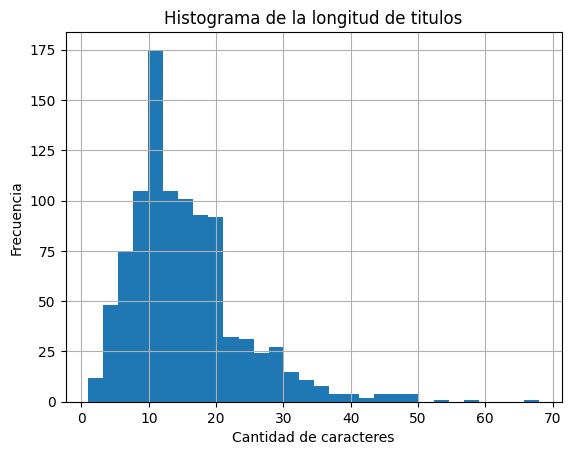

In [10]:
# grafica tus resultados
df['title_length'].hist(bins=30)
plt.title('Histograma de la longitud de titulos')
plt.xlabel('Cantidad de caracteres')
plt.ylabel('Frecuencia')
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [11]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
data = [10, 13, 14, 18, 22]

In [13]:
# Calcula la media de los 5 valores
media_data = sum(data)/len(data)
print(f"media: {media_data}")

media: 15.4


In [15]:
# Calcula las diferencias al cuadrado con respecto a la media
suma_diferencias = sum((x - media_data)**2 for x in data)
print(f"La diferencia al cuadrado con respecto a la media es: {suma_diferencias}")

La diferencia al cuadrado con respecto a la media es: 87.19999999999999


In [24]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
varianza_manual = suma_diferencias / len(data)
desviacion_manual = varianza_manual**0.5
print(f"Varianza: {varianza_manual}")
print(f"Desviación estándar: {desviacion_manual}")

Varianza: 17.439999999999998
Desviación estándar: 4.176122603564219
